In [1]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Activation, Flatten, MaxPooling2D, Convolution2D
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import tensorflow as tf
from tensorflow.python.keras.optimizer_v2.adam import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger
tf.random.set_seed(42)

C:\Users\ASUS\anaconda3\envs\ten\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ASUS\anaconda3\envs\ten\lib\site-packages\numpy\.libs\libopenblas.JPIJNSWNNAN3CE6LLI5FWSPHUT2VXMTH.gfortran-win_amd64.dll
C:\Users\ASUS\anaconda3\envs\ten\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


# Reading Data and Crating Data Variation

In [2]:
TRAIN_DATADIR = "./data/ChiplessRFID/train/"
training_data = []
CATEGORIES = ['Tag01', 'Tag02', 'Tag03', 'Tag04','Tag05','Tag06','Tag07','Tag08','Tag09','Tag10','Tag11','Tag12','Tag13',
               'Tag14','Tag15','Tag16','Tag17','Tag18','Tag19','Tag20','Tag21','Tag22','Tag23','Tag24','Tag25','Tag26',
               'Tag27']
IMG_SIZE = 150

def create_training_data():
    for category in CATEGORIES:
        
        path = os.path.join(TRAIN_DATADIR, category)
        class_num = CATEGORIES.index(category)
        
        for img in os.listdir(path): 
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            training_data.append([new_array, class_num])
                            


In [88]:
TRAIN_DATADIR = "./data/ChiplessRFID/train/"
training_data_50 = []
CATEGORIES = ['Tag01', 'Tag02', 'Tag03', 'Tag04','Tag05','Tag06','Tag07','Tag08','Tag09','Tag10','Tag11','Tag12','Tag13',
               'Tag14','Tag15','Tag16','Tag17','Tag18','Tag19','Tag20','Tag21','Tag22','Tag23','Tag24','Tag25','Tag26',
               'Tag27']
IMG_SIZE = 150

def create_training_data():
    for category in CATEGORIES:
        
        path = os.path.join(TRAIN_DATADIR, category)
        class_num = CATEGORIES.index(category)
        i = 0
        for img in os.listdir(path): 
            i+= 1
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            training_data.append([new_array, class_num])
            if i == 50:
                break

In [ ]:
print(len(training_data_50))

In [3]:
create_training_data()

In [4]:
print(len(training_data))

8100


In [5]:
### Shuffling the dataset
import random

random.shuffle(training_data)

In [6]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1,IMG_SIZE, IMG_SIZE, 1)

In [7]:
X = X/255.0
y = np.array(y)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [9]:
print(X.shape)
print(y.shape)

(8100, 150, 150, 1)
(8100,)


### Original Model 4 Conv Layers

In [10]:
model = Sequential()

# Step 1 - Convolution
model.add(Convolution2D(32, 3, 3, input_shape = (150, 150, 1), padding='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))


# Step 2 - Adding some other convolutional and Maxpool layers
model.add(Convolution2D(32, 3, 3, padding='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Convolution2D(32, 3, 3, padding='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Convolution2D(32, 3, 3, padding='same', activation = 'relu'))

# Step 3 - Flattening
model.add(Flatten())


# Step 4 - Full connection
model.add(Dense(128, activation = 'relu'))
model.add(Dense(27, activation = 'softmax'))


In [11]:
# Compiling the CNN

early_stop = EarlyStopping(monitor='val_loss', verbose=1, mode='min', patience=8)


callback_list = [early_stop]

adam = Adam(learning_rate=1e-4 * 10 ** (1/2))
model.compile(optimizer = adam, 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [12]:
# train model
history = model.fit(X_train,y_train,
    batch_size=20,
    epochs=50,
    callbacks= callback_list,
    validation_split=0.10)

Epoch 1/50
292/292 [==============================] - 7s 21ms/step - loss: 3.2924 - accuracy: 0.0442 - val_loss: 3.0920 - val_accuracy: 0.0926
Epoch 2/50
292/292 [==============================] - 6s 19ms/step - loss: 2.9297 - accuracy: 0.1186 - val_loss: 2.6448 - val_accuracy: 0.1466
Epoch 3/50
292/292 [==============================] - 7s 23ms/step - loss: 2.5492 - accuracy: 0.1852 - val_loss: 2.3270 - val_accuracy: 0.2299
Epoch 4/50
292/292 [==============================] - 7s 23ms/step - loss: 2.2050 - accuracy: 0.2836 - val_loss: 1.8985 - val_accuracy: 0.3750
Epoch 5/50
292/292 [==============================] - 7s 23ms/step - loss: 1.8564 - accuracy: 0.3961 - val_loss: 1.6420 - val_accuracy: 0.4259
Epoch 6/50
292/292 [==============================] - 6s 20ms/step - loss: 1.5671 - accuracy: 0.4777 - val_loss: 1.3565 - val_accuracy: 0.5664
Epoch 7/50
292/292 [==============================] - 5s 18ms/step - loss: 1.3335 - accuracy: 0.5511 - val_loss: 1.1870 - val_accuracy: 0.6327

In [13]:
y_pred = model.predict(X_test)

In [14]:
y_pred = np.argmax(y_pred, axis=-1)

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        57
           1       0.97      1.00      0.99        72
           2       0.97      1.00      0.98        57
           3       1.00      0.98      0.99        59
           4       0.94      0.97      0.95        62
           5       0.98      0.96      0.97        54
           6       0.98      1.00      0.99        47
           7       0.97      0.98      0.97        59
           8       0.98      1.00      0.99        56
           9       1.00      0.96      0.98        67
          10       1.00      0.91      0.95        65
          11       1.00      1.00      1.00        56
          12       0.98      0.98      0.98        57
          13       0.84      0.98      0.91        59
          14       0.96      0.91      0.93        70
          15       0.92      0.98      0.95        58
          16       1.00      0.86      0.93        59
          17       0.95    

[Text(0.5, 69.0, 'Predicted Class'), Text(114.0, 0.5, 'True Class')]

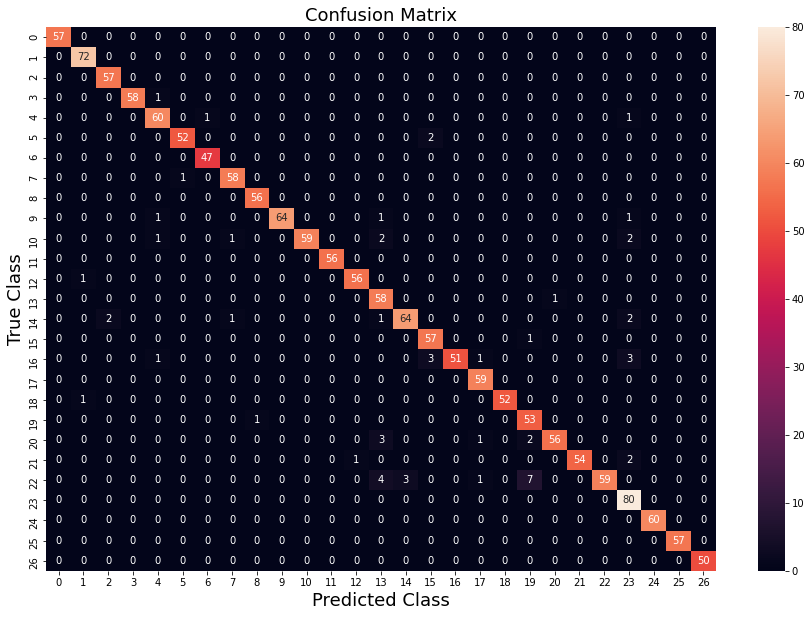

In [16]:
cf_matrix = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(15, 10))
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
s= sns.heatmap(cf_matrix, annot=True)
s.set(xlabel='Predicted Class', ylabel='True Class')

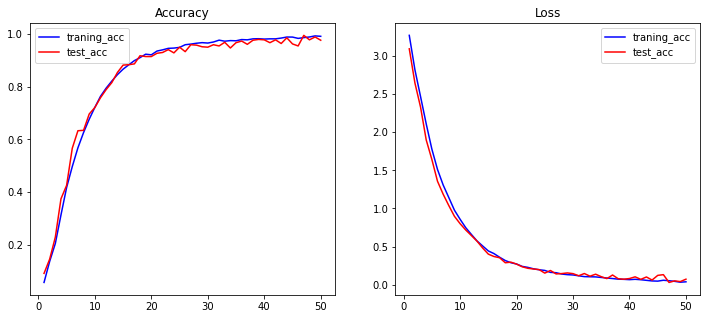

In [17]:
def plot_history(history):
    acc = history.history["accuracy"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    val_accuracy = history.history["val_accuracy"]
    
    x = range(1, len(acc) + 1)
    
    plt.figure(figsize=(12,5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, "b", label="traning_acc")
    plt.plot(x, val_accuracy, "r", label="test_acc")
    plt.title("Accuracy")
    plt.legend(loc='best')
    
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, "b", label="traning_acc")
    plt.plot(x, val_loss, "r", label="test_acc")
    plt.title("Loss")
    plt.legend(loc='best')
    
    
plot_history(history)

## Adding more layers

In [48]:
INPUT_SHAPE = (150,150,1)

model_1 = Sequential()

# Step 1 - Convolution
model_1.add(Convolution2D(32, 3, 3, input_shape = INPUT_SHAPE, padding='same'))
model_1.add(Activation('relu'))
          
          
model_1.add(Convolution2D(32, 3, 3, padding='same'))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size = (2, 2)))

model_1.add(Convolution2D(64, 3, 3,  padding='same'))
model_1.add(Activation('relu'))
# model_1.add(BatchNormalization())
model_1.add(MaxPooling2D(pool_size = (2, 2)))


model_1.add(Convolution2D(64, 3, 3,  padding='same'))
model_1.add(Activation('relu'))

model_1.add(Convolution2D(128, 3, 3, padding='same'))
model_1.add(Activation('relu'))
          

# Step 3 - Flattening
model_1.add(Flatten())


# Step 4 - Full connection
model_1.add(Dense(128, activation = 'relu'))
model_1.add(Dense(27, activation = 'softmax'))

In [49]:
# Compiling the CNN

early_stop = EarlyStopping(monitor='val_loss', verbose=1, mode='min', patience=8)


callback_list = [early_stop]

adam = Adam(learning_rate=0.001)
model_1.compile(optimizer = adam, 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [50]:
# train model
history_m1 = model_1.fit(X_train,y_train,
    batch_size=20,
    epochs=50,
    callbacks= callback_list,
    validation_split=0.10)

Epoch 1/50
292/292 [==============================] - 4s 14ms/step - loss: 3.2930 - accuracy: 0.0382 - val_loss: 3.0743 - val_accuracy: 0.1019
Epoch 2/50
292/292 [==============================] - 4s 13ms/step - loss: 2.8444 - accuracy: 0.1369 - val_loss: 2.3054 - val_accuracy: 0.2392
Epoch 3/50
292/292 [==============================] - 4s 14ms/step - loss: 2.0090 - accuracy: 0.3274 - val_loss: 1.9624 - val_accuracy: 0.3457
Epoch 4/50
292/292 [==============================] - 4s 13ms/step - loss: 1.4624 - accuracy: 0.4925 - val_loss: 1.0956 - val_accuracy: 0.6250
Epoch 5/50
292/292 [==============================] - 4s 14ms/step - loss: 1.0156 - accuracy: 0.6435 - val_loss: 0.8868 - val_accuracy: 0.6713
Epoch 6/50
292/292 [==============================] - 4s 14ms/step - loss: 0.7926 - accuracy: 0.7235 - val_loss: 0.6944 - val_accuracy: 0.7608
Epoch 7/50
292/292 [==============================] - 4s 14ms/step - loss: 0.6335 - accuracy: 0.7779 - val_loss: 0.5991 - val_accuracy: 0.7978

In [54]:
y_pred_m1 = model_1.predict(X_test)
y_pred_m1 = np.argmax(y_pred_m1, axis=-1)
print(classification_report(y_test, y_pred_m1))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        57
           1       1.00      0.97      0.99        72
           2       0.95      0.98      0.97        57
           3       0.98      0.98      0.98        59
           4       0.98      0.97      0.98        62
           5       0.96      1.00      0.98        54
           6       0.94      1.00      0.97        47
           7       1.00      0.88      0.94        59
           8       0.98      0.98      0.98        56
           9       0.98      0.94      0.96        67
          10       0.90      0.97      0.93        65
          11       1.00      0.98      0.99        56
          12       0.88      0.98      0.93        57
          13       1.00      0.95      0.97        59
          14       0.99      0.96      0.97        70
          15       0.97      0.98      0.97        58
          16       0.98      1.00      0.99        59
          17       0.98    

[Text(0.5, 69.0, 'Predicted Class'), Text(114.0, 0.5, 'True Class')]

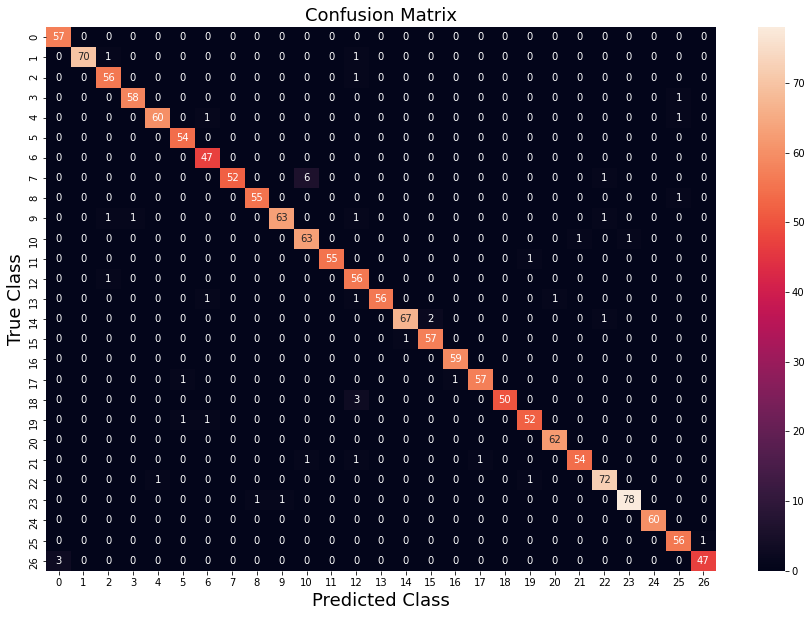

In [55]:
cf_matrix = confusion_matrix(y_test, y_pred_m1)

fig, ax = plt.subplots(figsize=(15, 10))
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
s= sns.heatmap(cf_matrix, annot=True)
s.set(xlabel='Predicted Class', ylabel='True Class')

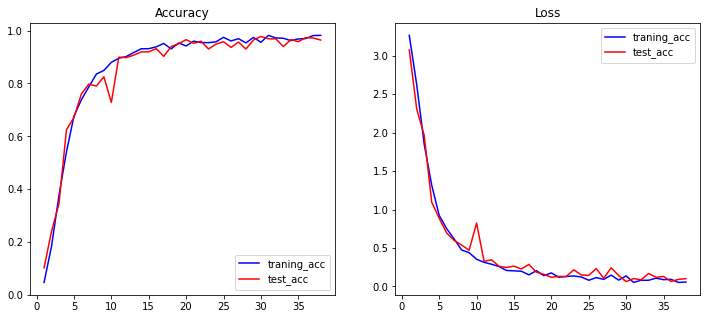

In [56]:
def plot_history(history_m1):
    acc = history_m1.history["accuracy"]
    loss = history_m1.history["loss"]
    val_loss = history_m1.history["val_loss"]
    val_accuracy = history_m1.history["val_accuracy"]
    
    x = range(1, len(acc) + 1)
    
    plt.figure(figsize=(12,5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, "b", label="traning_acc")
    plt.plot(x, val_accuracy, "r", label="test_acc")
    plt.title("Accuracy")
    plt.legend(loc='best')
    
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, "b", label="traning_acc")
    plt.plot(x, val_loss, "r", label="test_acc")
    plt.title("Loss")
    plt.legend(loc='best')
    
    
plot_history(history_m1)

In [36]:
INPUT_SHAPE = (150,150,1)

model_2 = Sequential()

# Step 1 - Convolution
model_2.add(Convolution2D(32, 3, 3, input_shape = INPUT_SHAPE, padding='same'))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size = (2, 2)))          
          
model_2.add(Convolution2D(32, 3, 3,  padding='same'))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size = (2, 2)))


model_2.add(Convolution2D(64, 3, 3, padding='same'))
model_2.add(Activation('relu'))



model_2.add(Convolution2D(64, 3, 3,  padding='same'))
model_2.add(Activation('relu'))

model_2.add(Convolution2D(128, 3, 3,  padding='same'))
model_2.add(Activation('relu'))



model_2.add(Convolution2D(128, 3, 3, padding='same'))
model_2.add(Activation('relu'))



# Step 3 - Flattening
model_2.add(Flatten())


# Step 4 - Full connection
model_2.add(Dense(128, activation = 'relu'))
model_2.add(Dense(27, activation = 'softmax'))

In [37]:
# Compiling the CNN

early_stop = EarlyStopping(monitor='val_loss', verbose=1, mode='min', patience=8)


callback_list = [early_stop]

adam = Adam(learning_rate=0.001)
model_2.compile(optimizer = adam, 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [38]:
# train model
history_m2 = model_2.fit(X_train,y_train,
    batch_size=20,
    epochs=50,
    callbacks= callback_list,
    validation_split=0.10)

Epoch 1/50
292/292 [==============================] - 5s 15ms/step - loss: 3.2964 - accuracy: 0.0412 - val_loss: 3.2954 - val_accuracy: 0.0417
Epoch 2/50
292/292 [==============================] - 5s 16ms/step - loss: 3.0992 - accuracy: 0.0755 - val_loss: 2.7447 - val_accuracy: 0.1142
Epoch 3/50
292/292 [==============================] - 4s 15ms/step - loss: 2.6353 - accuracy: 0.1441 - val_loss: 2.2159 - val_accuracy: 0.2500
Epoch 4/50
292/292 [==============================] - 4s 15ms/step - loss: 2.0730 - accuracy: 0.3216 - val_loss: 1.5967 - val_accuracy: 0.4352
Epoch 5/50
292/292 [==============================] - 4s 14ms/step - loss: 1.4851 - accuracy: 0.4954 - val_loss: 1.1332 - val_accuracy: 0.5910
Epoch 6/50
292/292 [==============================] - 4s 14ms/step - loss: 1.0921 - accuracy: 0.6114 - val_loss: 0.8479 - val_accuracy: 0.6836
Epoch 7/50
292/292 [==============================] - 4s 15ms/step - loss: 0.8011 - accuracy: 0.7172 - val_loss: 0.6959 - val_accuracy: 0.7330

In [39]:
y_pred_m2 = model_2.predict(X_test)
y_pred_m2 = np.argmax(y_pred_m2, axis=-1)
print(classification_report(y_test, y_pred_m2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        57
           1       1.00      1.00      1.00        72
           2       1.00      1.00      1.00        57
           3       1.00      1.00      1.00        59
           4       1.00      1.00      1.00        62
           5       0.98      1.00      0.99        54
           6       1.00      1.00      1.00        47
           7       1.00      0.98      0.99        59
           8       1.00      1.00      1.00        56
           9       1.00      1.00      1.00        67
          10       1.00      0.98      0.99        65
          11       1.00      1.00      1.00        56
          12       1.00      1.00      1.00        57
          13       1.00      0.98      0.99        59
          14       1.00      0.99      0.99        70
          15       1.00      1.00      1.00        58
          16       0.97      1.00      0.98        59
          17       1.00    

[Text(0.5, 69.0, 'Predicted Class'), Text(114.0, 0.5, 'True Class')]

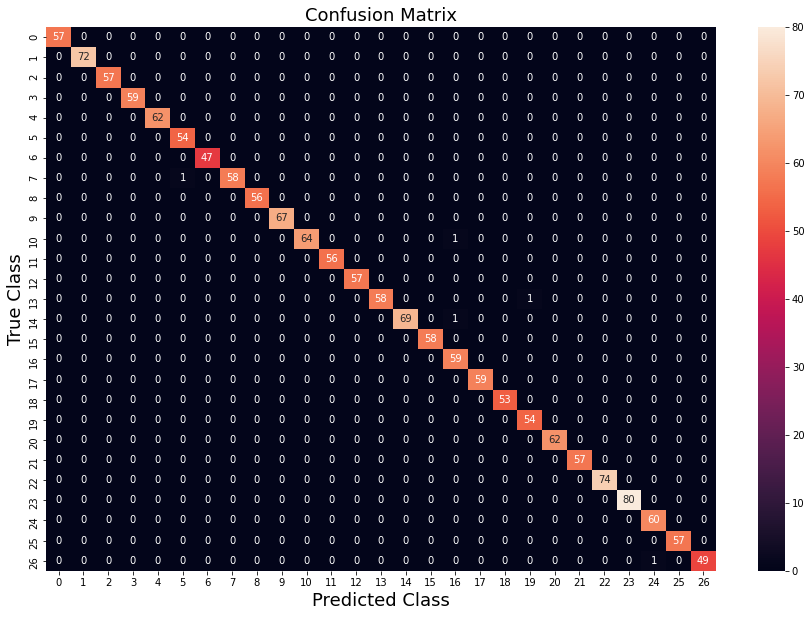

In [40]:
cf_matrix = confusion_matrix(y_test, y_pred_m2)

fig, ax = plt.subplots(figsize=(15, 10))
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
s= sns.heatmap(cf_matrix, annot=True)
s.set(xlabel='Predicted Class', ylabel='True Class')

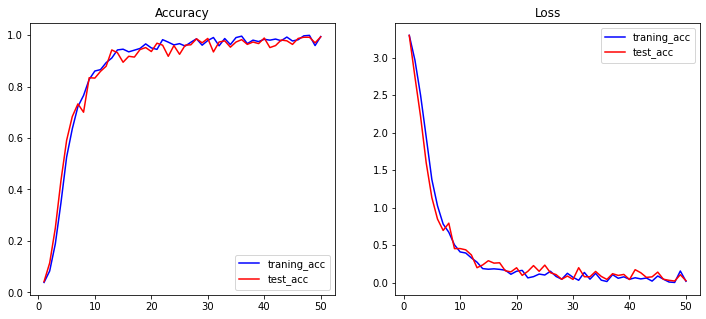

In [41]:
def plot_history(history_m1):
    acc = history_m1.history["accuracy"]
    loss = history_m1.history["loss"]
    val_loss = history_m1.history["val_loss"]
    val_accuracy = history_m1.history["val_accuracy"]
    
    x = range(1, len(acc) + 1)
    
    plt.figure(figsize=(12,5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, "b", label="traning_acc")
    plt.plot(x, val_accuracy, "r", label="test_acc")
    plt.title("Accuracy")
    plt.legend(loc='best')
    
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, "b", label="traning_acc")
    plt.plot(x, val_loss, "r", label="test_acc")
    plt.title("Loss")
    plt.legend(loc='best')
    
    
plot_history(history_m2)

In [62]:
INPUT_SHAPE = (150,150,1)

model_3 = Sequential()

# Step 1 - Convolution
model_3.add(Convolution2D(32, 3, 3, input_shape = INPUT_SHAPE, padding='same'))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size = (2, 2)))          
          
model_3.add(Convolution2D(32, 3, 3,  padding='same'))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size = (2, 2)))


model_3.add(Convolution2D(64, 3, 3, padding='same'))
model_3.add(Activation('relu'))



model_3.add(Convolution2D(64, 3, 3,  padding='same'))
model_3.add(Activation('relu'))

model_3.add(Convolution2D(128, 3, 3,  padding='same'))
model_3.add(Activation('relu'))

model_3.add(Convolution2D(128, 3, 3,  padding='same'))
model_3.add(Activation('relu'))

model_3.add(Convolution2D(256, 3, 3, padding='same'))
model_3.add(Activation('relu'))



# Step 3 - Flattening
model_3.add(Flatten())


# Step 4 - Full connection
model_3.add(Dense(128, activation = 'relu'))
model_3.add(Dense(27, activation = 'softmax'))

In [63]:
# Compiling the CNN

early_stop = EarlyStopping(monitor='val_loss', verbose=1, mode='min', patience=8)


callback_list = [early_stop]

adam = Adam(learning_rate=0.001)
model_3.compile(optimizer = adam, 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [64]:
# train model
history_m3 = model_3.fit(X_train,y_train,
    batch_size=20,
    epochs=50,
    callbacks= callback_list,
    validation_split=0.10)

Epoch 1/50
292/292 [==============================] - 5s 17ms/step - loss: 3.2962 - accuracy: 0.0389 - val_loss: 3.2967 - val_accuracy: 0.0278
Epoch 2/50
292/292 [==============================] - 5s 17ms/step - loss: 3.1301 - accuracy: 0.0748 - val_loss: 2.8397 - val_accuracy: 0.0802
Epoch 3/50
292/292 [==============================] - 5s 18ms/step - loss: 2.7657 - accuracy: 0.0900 - val_loss: 2.5594 - val_accuracy: 0.1559
Epoch 4/50
292/292 [==============================] - 5s 17ms/step - loss: 2.4787 - accuracy: 0.1714 - val_loss: 2.2403 - val_accuracy: 0.2114
Epoch 5/50
292/292 [==============================] - 5s 17ms/step - loss: 2.1725 - accuracy: 0.2459 - val_loss: 1.8644 - val_accuracy: 0.3827
Epoch 6/50
292/292 [==============================] - 5s 18ms/step - loss: 1.7877 - accuracy: 0.3748 - val_loss: 1.5724 - val_accuracy: 0.4059
Epoch 7/50
292/292 [==============================] - 5s 17ms/step - loss: 1.4921 - accuracy: 0.4609 - val_loss: 1.2262 - val_accuracy: 0.5324

In [79]:
y_pred_m3 = model_3.predict(X_test)
y_pred_m3 = np.argmax(y_pred_m3, axis=-1)
print(classification_report(y_test, y_pred_m3))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        57
           1       0.99      1.00      0.99        72
           2       1.00      0.96      0.98        57
           3       0.98      1.00      0.99        59
           4       0.98      0.94      0.96        62
           5       0.96      1.00      0.98        54
           6       0.96      0.98      0.97        47
           7       0.98      0.98      0.98        59
           8       1.00      0.98      0.99        56
           9       1.00      1.00      1.00        67
          10       0.98      1.00      0.99        65
          11       0.98      1.00      0.99        56
          12       1.00      0.98      0.99        57
          13       1.00      0.95      0.97        59
          14       1.00      0.93      0.96        70
          15       0.98      0.98      0.98        58
          16       0.97      0.98      0.97        59
          17       0.95    

[Text(0.5, 69.0, 'Predicted Class'), Text(114.0, 0.5, 'True Class')]

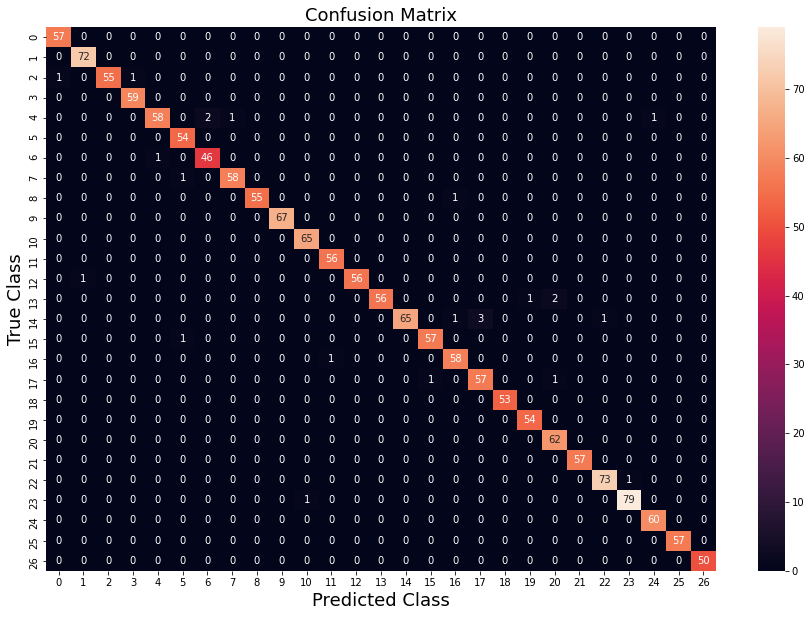

In [80]:
cf_matrix = confusion_matrix(y_test, y_pred_m3)

fig, ax = plt.subplots(figsize=(15, 10))
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
s= sns.heatmap(cf_matrix, annot=True)
s.set(xlabel='Predicted Class', ylabel='True Class')

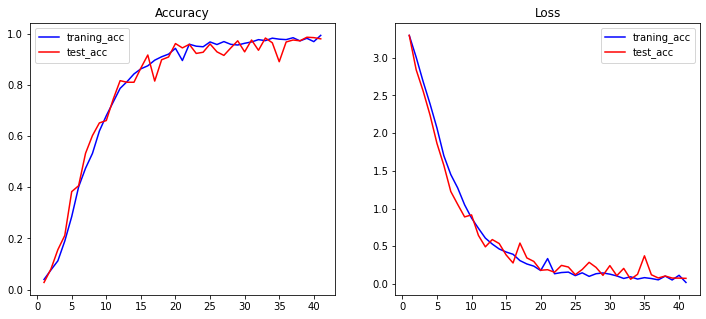

In [81]:
def plot_history(history_m1):
    acc = history_m1.history["accuracy"]
    loss = history_m1.history["loss"]
    val_loss = history_m1.history["val_loss"]
    val_accuracy = history_m1.history["val_accuracy"]
    
    x = range(1, len(acc) + 1)
    
    plt.figure(figsize=(12,5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, "b", label="traning_acc")
    plt.plot(x, val_accuracy, "r", label="test_acc")
    plt.title("Accuracy")
    plt.legend(loc='best')
    
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, "b", label="traning_acc")
    plt.plot(x, val_loss, "r", label="test_acc")
    plt.title("Loss")
    plt.legend(loc='best')
    
    
plot_history(history_m3)

# Learning rate optimization

In [84]:
model_LRO = Sequential()

# Step 1 - Convolution
model_LRO.add(Convolution2D(32, 3, 3, input_shape = (150, 150, 1), padding='same', activation = 'relu'))
model_LRO.add(MaxPooling2D(pool_size = (2, 2)))


# Step 2 - Adding some other convolutional and Maxpool layers
model_LRO.add(Convolution2D(32, 3, 3, padding='same', activation = 'relu'))
model_LRO.add(MaxPooling2D(pool_size = (2, 2)))

model_LRO.add(Convolution2D(32, 3, 3, padding='same', activation = 'relu'))
model_LRO.add(MaxPooling2D(pool_size = (2, 2)))

model_LRO.add(Convolution2D(32, 3, 3, padding='same', activation = 'relu'))

# Step 3 - Flattening
model_LRO.add(Flatten())


# Step 4 - Full connection
model_LRO.add(Dense(128, activation = 'relu'))
model_LRO.add(Dense(27, activation = 'softmax'))

In [85]:
# Compiling the CNN
model_LRO.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [86]:
# train model
history_LRO = model_LRO.fit(X_train,y_train,
 batch_size=20,
 epochs=100,
    callbacks=[
    tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-3 * 10 ** (epoch / 30))
    ],
 validation_split=0.10)

Epoch 1/100
292/292 [==============================] - 5s 15ms/step - loss: 3.2778 - accuracy: 0.0401 - val_loss: 2.7625 - val_accuracy: 0.1574
Epoch 2/100
292/292 [==============================] - 4s 15ms/step - loss: 2.4971 - accuracy: 0.2349 - val_loss: 1.7632 - val_accuracy: 0.4228
Epoch 3/100
292/292 [==============================] - 7s 22ms/step - loss: 1.3880 - accuracy: 0.5529 - val_loss: 0.8473 - val_accuracy: 0.7253
Epoch 4/100
292/292 [==============================] - 5s 17ms/step - loss: 0.7602 - accuracy: 0.7492 - val_loss: 0.5591 - val_accuracy: 0.8009
Epoch 5/100
292/292 [==============================] - 5s 18ms/step - loss: 0.4849 - accuracy: 0.8412 - val_loss: 0.4248 - val_accuracy: 0.8596
Epoch 6/100
292/292 [==============================] - 5s 17ms/step - loss: 0.3439 - accuracy: 0.8840 - val_loss: 0.4480 - val_accuracy: 0.8519
Epoch 7/100
292/292 [==============================] - 5s 17ms/step - loss: 0.2498 - accuracy: 0.9149 - val_loss: 0.2782 - val_accuracy:

292/292 [==============================] - 5s 18ms/step - loss: 3.3158 - accuracy: 0.0358 - val_loss: 3.3156 - val_accuracy: 0.0278
Epoch 58/100
292/292 [==============================] - 5s 18ms/step - loss: 3.3169 - accuracy: 0.0389 - val_loss: 3.3114 - val_accuracy: 0.0355
Epoch 59/100
292/292 [==============================] - 6s 19ms/step - loss: 3.3198 - accuracy: 0.0351 - val_loss: 3.3320 - val_accuracy: 0.0355
Epoch 60/100
292/292 [==============================] - 6s 19ms/step - loss: 3.3212 - accuracy: 0.0391 - val_loss: 3.3152 - val_accuracy: 0.0355
Epoch 61/100
292/292 [==============================] - 5s 18ms/step - loss: 3.3249 - accuracy: 0.0334 - val_loss: 3.3323 - val_accuracy: 0.0401
Epoch 62/100
292/292 [==============================] - 5s 19ms/step - loss: 3.3285 - accuracy: 0.0332 - val_loss: 3.3322 - val_accuracy: 0.0340
Epoch 63/100
292/292 [==============================] - 5s 19ms/step - loss: 3.3264 - accuracy: 0.0399 - val_loss: 3.3533 - val_accuracy: 0.035

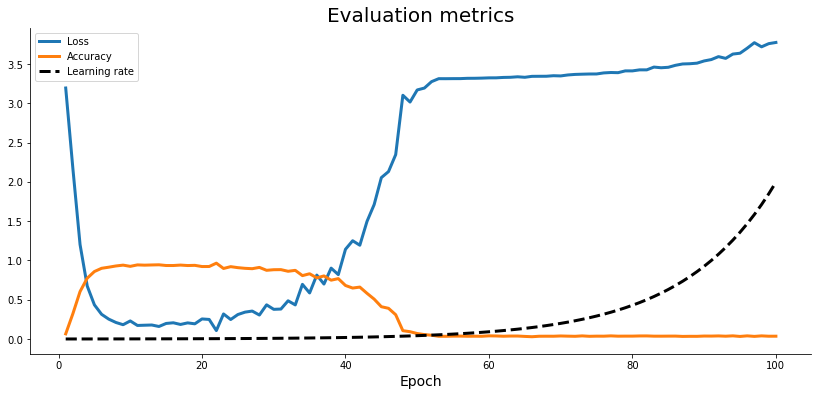

In [87]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = (14, 6)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False 

plt.plot(
    np.arange(1, 101), 
    history_LRO.history['loss'], 
    label='Loss', lw=3
)
plt.plot(
    np.arange(1, 101), 
    history_LRO.history['accuracy'], 
    label='Accuracy', lw=3
)
plt.plot(
    np.arange(1, 101), 
    history_LRO.history['lr'], 
    label='Learning rate', color='#000', lw=3, linestyle='--'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

## Saving the Models

In [42]:
model.save('baseModel.h5')

In [44]:
base_train_loss, base_train_accuracy = model.evaluate(X_train, y_train)
base_test_loss, base_test_acc = model.evaluate(X_test, y_test)

51/51 [==============================] - 0s 6ms/step - loss: 0.0947 - accuracy: 0.9642


In [57]:
model_1.save('model_1_5Conv.h5')

In [58]:
Conv5_train_loss, Conv5_base_train_accuracy = model_1.evaluate(X_train, y_train)
Conv5_base_test_loss, Conv5_base_test_acc = model_1.evaluate(X_test, y_test)

51/51 [==============================] - 0s 6ms/step - loss: 0.0826 - accuracy: 0.9710


In [59]:
model_2.save('model_2_6Conv.h5')

In [60]:
Conv6_train_loss, Conv6_base_train_accuracy = model_2.evaluate(X_train, y_train)
Conv6_base_test_loss, Conv6_base_test_acc = model_2.evaluate(X_test, y_test)

51/51 [==============================] - 0s 6ms/step - loss: 0.0192 - accuracy: 0.9969


In [82]:
model_3.save('model_3_7Conv.h5')

In [83]:
Conv7_train_loss, Conv7_base_train_accuracy = model_3.evaluate(X_train, y_train)
Conv7_base_test_loss, Conv7_base_test_acc = model_3.evaluate(X_test, y_test)

51/51 [==============================] - 0s 6ms/step - loss: 0.0725 - accuracy: 0.9852


In [66]:
from tensorflow.keras.models import load_model

In [69]:
model_new = load_model('model_2_6Conv.h5')

# Base Model Data Variation

# Resnet 50

### Preparing data for 3 chanel pretrained model

In [ ]:
def grayToRgb(X):
    X = np.array(X)
#     X = np.expand_dims(X, -1)
    X = X.repeat(3, axis=-1)
    return X

In [ ]:
X_train = grayToRgb(X_train)
X_test = grayToRgb(X_test)

In [ ]:
print(X_train.shape)
print(X_test.shape)

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Input 

resnet50 = Sequential()

#add the pretrained model
resnet50.add(ResNet50(include_top=False, pooling='avg', weights='imagenet'))
resnet50.add(Input(shape=(IMG_SIZE,IMG_SIZE,1)))
#add the fully connected last layers as per need
resnet50.add(Dense(512, activation='relu'))
resnet50.add(Dense(27, activation='softmax'))

#set resnet layers not trainable
resnet50.layers[0].trainable = False

resnet50.summary()

In [ ]:
# Compiling the CNN
vgg16.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
# train model
history_VGG16 = vgg16.fit(X_train,y_train,
 batch_size=32,
 epochs=50,
 validation_split=0.15)

# mm-Wave Paper Code

In [ ]:
model = Sequential()
# Step 1 - Convolution
model.add(Convolution2D(32, 3, 1, input_shape = (150, 150, 3),padding='same',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

# Step 2 - Adding some other convolutional and Maxpool layers
model.add(Convolution2D(32, 3, 3, padding='same',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Convolution2D(32, 3, 3, padding='same',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Convolution2D(32, 3, 3, padding='same',activation = 'relu'))

# Step 3 - Flattening
model.add(Flatten())

# Step 4 - Full connection
model.add(Dense(128, activation = 'relu'))
model.add(Dense(27, activation = 'sigmoid'))

# Compiling the CNN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# define data augmentation configuration
train_datagen = ImageDataGenerator(featurewise_center=True, 
                    featurewise_std_normalization=True,                                  
                    zca_whitening=True)
# train generator
train_generator = train_datagen.flow_from_directory('./data/ChiplessRFID/train/',
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='categorical')

# test generator
test_generator = train_datagen.flow_from_directory('./data/ChiplessRFID/validate',
                                                   target_size=(150, 150),
                                                   batch_size=32,
                                                   class_mode='categorical')

In [ ]:
# train model
history = model.fit_generator(train_generator,
                              steps_per_epoch=32,   
                              epochs=50,   
                              validation_data=test_generator, # optional - if used needs to be defined   
                              validation_steps=10)